<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_TF_keras_pic_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" align="left" width="251" height="251">
</p>
<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />



# Tensorflow + keras képfelismerés

## A minta használata

Ez egy a Jupyter notebook mely a Tensorflow  mintakód kipróbálásra szolgál.
Ha nem akarunk telepíteni és rendelkezünk google email címmel akkor szabadon kiróbálhatjuk a google felhő szolgáltatásával itt:  [Google Colab](https://colab.research.google.com) 


Az egyes mintakódokat a kódblokk mellett balra található kis play gombbal tudjuk futtatni.


Ha a Tensorflow minta tetszik, készíthetünk másolatot ebből a notebookból, így módosíthatod a kódokat és megnézheted a futás eredményét, vagy új kódblokk hozzáadásával (felül a +Code) saját kódokat is írhatunk hozzá.

</div>


---

A lenti kódblokk létrehoz egy többrétegű konvolúciós neurális hálót, majd a CIFAR10 minta adatbázis alapján betanítja azt és elmenti a betanított hálózatot. 

Az adatbázis letölthető az alábi helyről : [db forras](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)

---


In [0]:
# TensorFlow CNN model training example 
# based on https://www.tensorflow.org/tutorials/images/cnn

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

model.save('kl_model.h5')

---

Ha sikeresen lefutott a fenti tanítás, akkor létrejött a my_model.h5 fájl, ami a betanított modellt tartalmazza. A következő kódrészletben ezt fogjuk használni, és felismerni vele egy hajot.

Teszt három hajó példánál megfogható a tévedés is:
  - A 1 és 2 mintát biztosan eltalálja hajónak.
  - A 15-ös mintát tévesen békának (frog) jelőli 61,6% és csak 21,7% ban tippeli hajónak.

---

1 [[1.9228178e-03 2.6269299e-03 4.7562628e-07 5.5097926e-06 8.7069481e-07
  3.3569554e-09 6.0042140e-08 7.0312680e-08 9.9538761e-01 5.5595370e-05]]


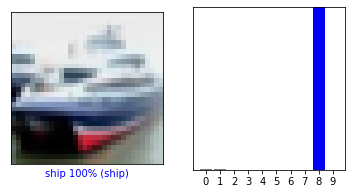

2 [[4.02548239e-02 9.33190659e-02 4.80340277e-05 3.01334937e-03
  2.22218543e-04 1.44131345e-05 7.61669216e-05 1.35923692e-04
  8.46484423e-01 1.64315999e-02]]


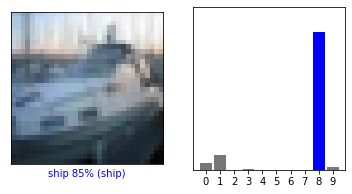

15 [[7.8094122e-03 7.9216734e-02 5.0293680e-02 1.9250015e-02 3.4158535e-03
  2.5799684e-03 6.1669052e-01 3.3149775e-04 2.1777739e-01 2.6349742e-03]]


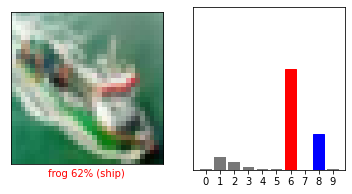

In [15]:
# TensorFlow image classification test example
# based on https://www.tensorflow.org/tutorials/keras/classification


from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

model = load_model('kl_model.h5')

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#i = 1   ## 0: cica 1: hajo, 2: hajo
#for i in range(1,20):  # 1: hajo, 2: hajo
kl=(1,2,15)
for i in kl:  # 1: hajo, 2: hajo
  predictions = model.predict(test_images[i:i+1])
  print(i, predictions)

  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[0], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[0],  test_labels)
  plt.show()